In [5]:
# Creating an environment is important not neccessary for the mne to run
# It make sure that the environment doesnot affects the other python program if you are running it8

In [6]:
#for running conda straight from prompt rather than the navigator use the following code
#Conda activate mne_env
#jupyternotebook --- its runs the jupyter notebook in the browser of the system 

#This way you dont have to open the anaconda navigator and system is not overrunned.


In [141]:
!pip install mne
import mne
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
!pip install mne-bids


In [8]:
import os
print(os.path.isfile('C:/Users/uSer/Downloads/EEG_data_PSY4061/EEG_data_PSY4061/Raw/Participant_05.vhdr'))

True


In [9]:
#raw = mne.io.read_raw_brainvision('C:/Users/uSer/Downloads/EEG_data_PSY4061/EEG_data_PSY4061/Raw/Participant_05.vhdr', preload=True)
raw = mne.io.read_raw_bdf('C:/Users/uSer/Downloads/EEG_data_PSY4061/EEG_data_PSY4061/Raw/P_04.bdf', preload=True)




Extracting EDF parameters from C:\Users\uSer\Downloads\EEG_data_PSY4061\EEG_data_PSY4061\Raw\P_04.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3514367  =      0.000 ...  1716.000 secs...


Using matplotlib as 2D backend.


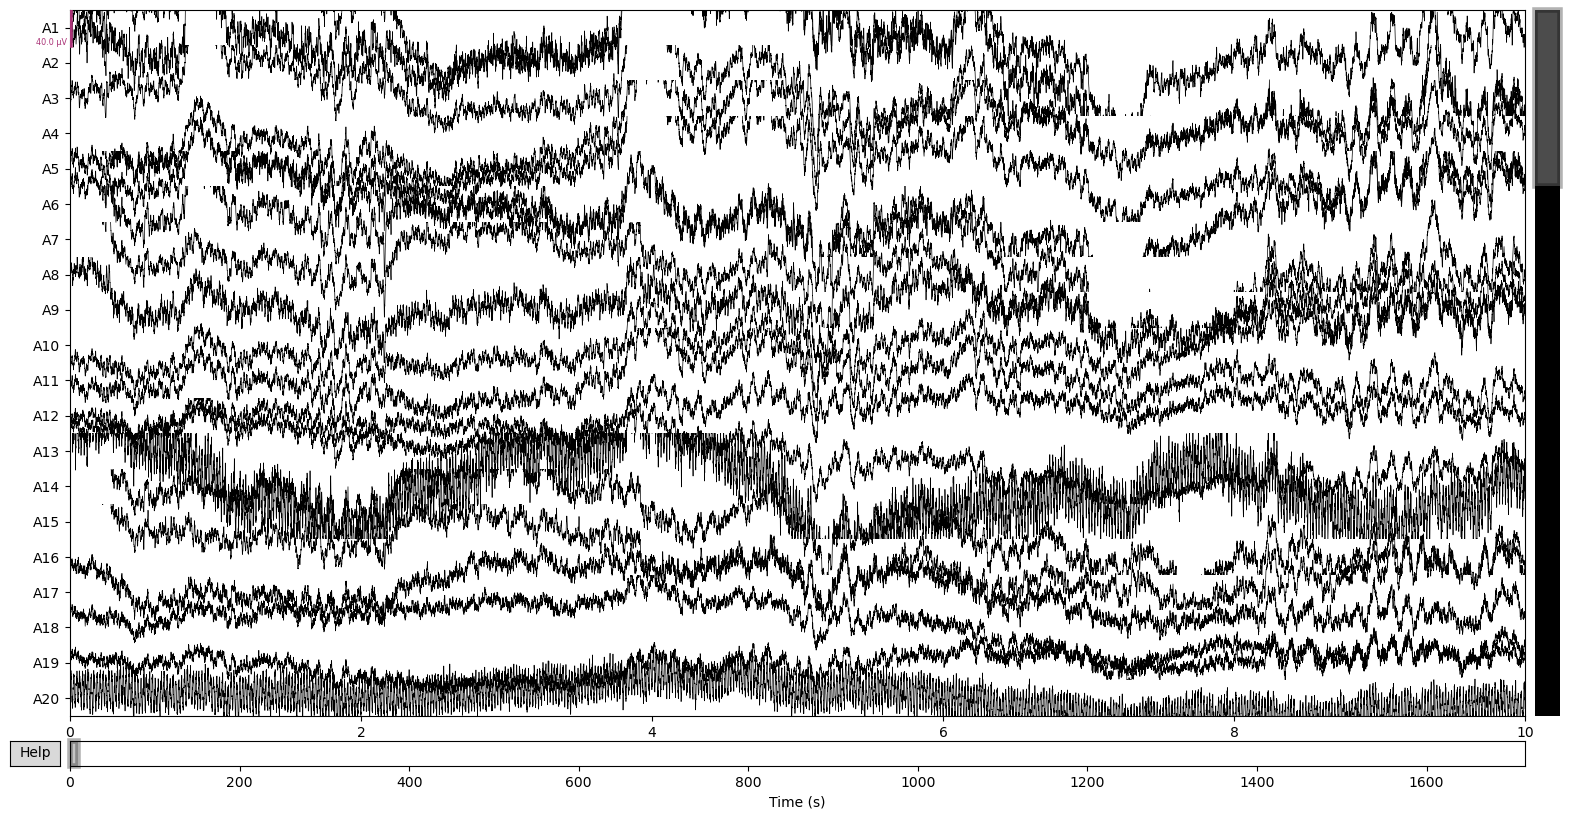

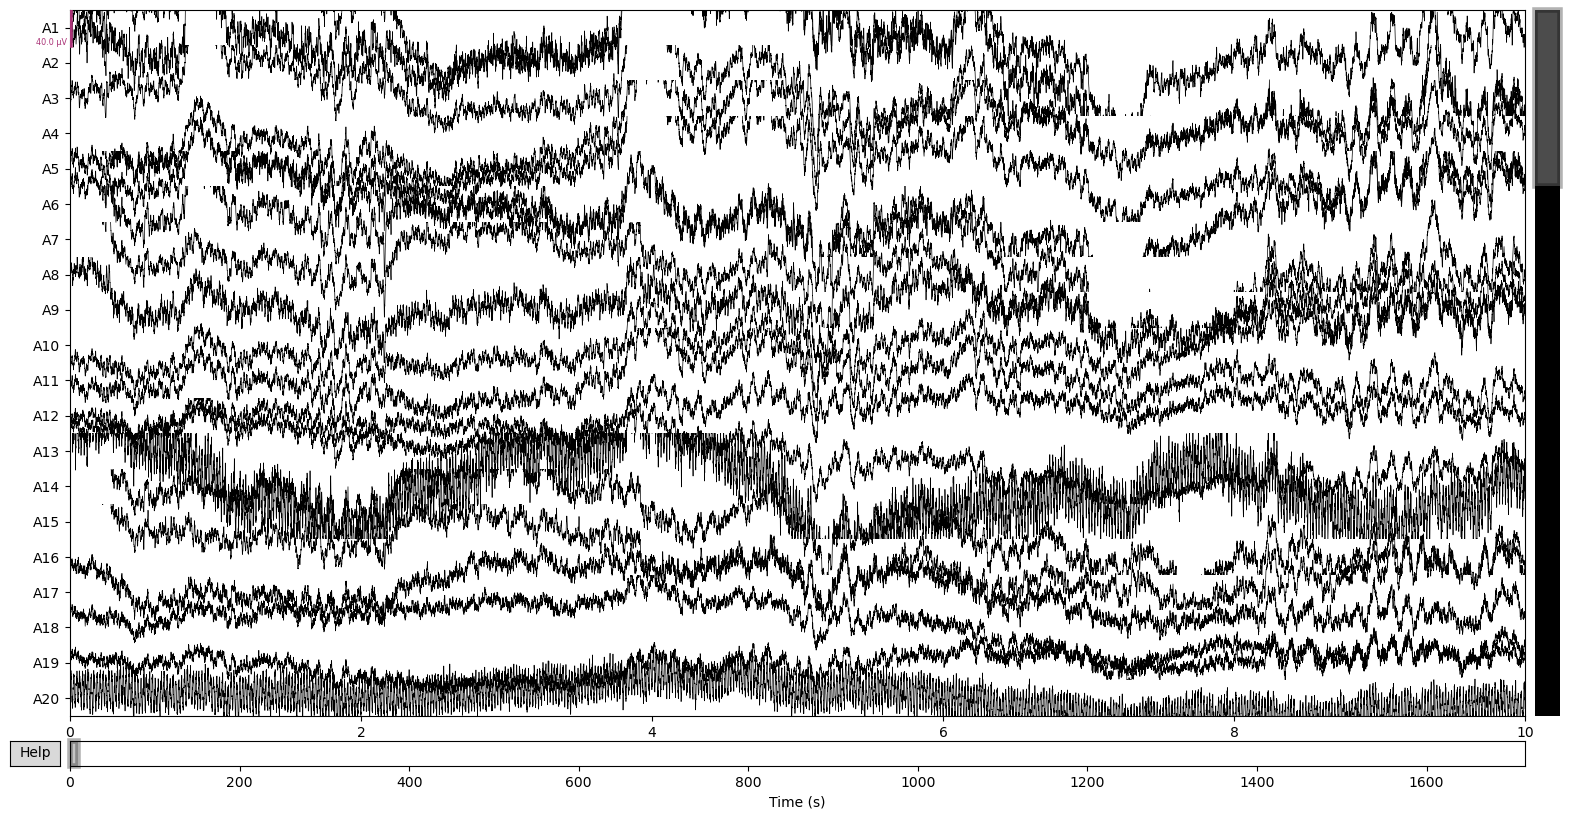

In [10]:
raw.plot()

In [17]:
raw.filter(0.1,40 )

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 67585 samples (33.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:   29.9s


<RawEDF | P_04.bdf, 80 x 3514368 (1716.0 s), ~2.09 GiB, data loaded>

In [43]:
raw.plot?

Signature:
raw.plot(
    events=None,
    duration=10.0,
    start=0.0,
    n_channels=20,
    bgcolor='w',
    color=None,
    bad_color='lightgray',
    event_color='cyan',
    scalings=None,
    remove_dc=True,
    order=None,
    show_options=False,
    title=None,
    show=True,
    block=False,
    highpass=None,
    lowpass=None,
    filtorder=4,
    clipping=1.5,
    show_first_samp=False,
    proj=True,
    group_by='type',
    butterfly=False,
    decim='auto',
    noise_cov=None,
    event_id=None,
    show_scrollbars=True,
    show_scalebars=True,
    time_format='float',
    precompute=None,
    use_opengl=None,
    *,
    picks=None,
    theme=None,
    overview_mode=None,
    splash=True,
    verbose=None,
)
Docstring:
Plot raw data.

Parameters
----------
events : array | None
    Events to show with vertical bars.
duration : float
    Time window (s) to plot. The lesser of this value and the duration
    of the raw file will be used.
start : float
    Initial time to s

In [125]:
events = mne.find_events(raw, stim_channel='Status', shortest_event=1)
print(raw.ch_names)
event_id = {
    1: 'Stimulus/Left',
    2: 'Stimulus/Right',
    10: 'Response'
}

Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2520 events found on stim channel Status
Event IDs: [  1   2  10  21  22  24  31  33  35  41  42  44  51  53  55  62  72  82
  92 121 131 141 151 162 172 182 192]
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status']


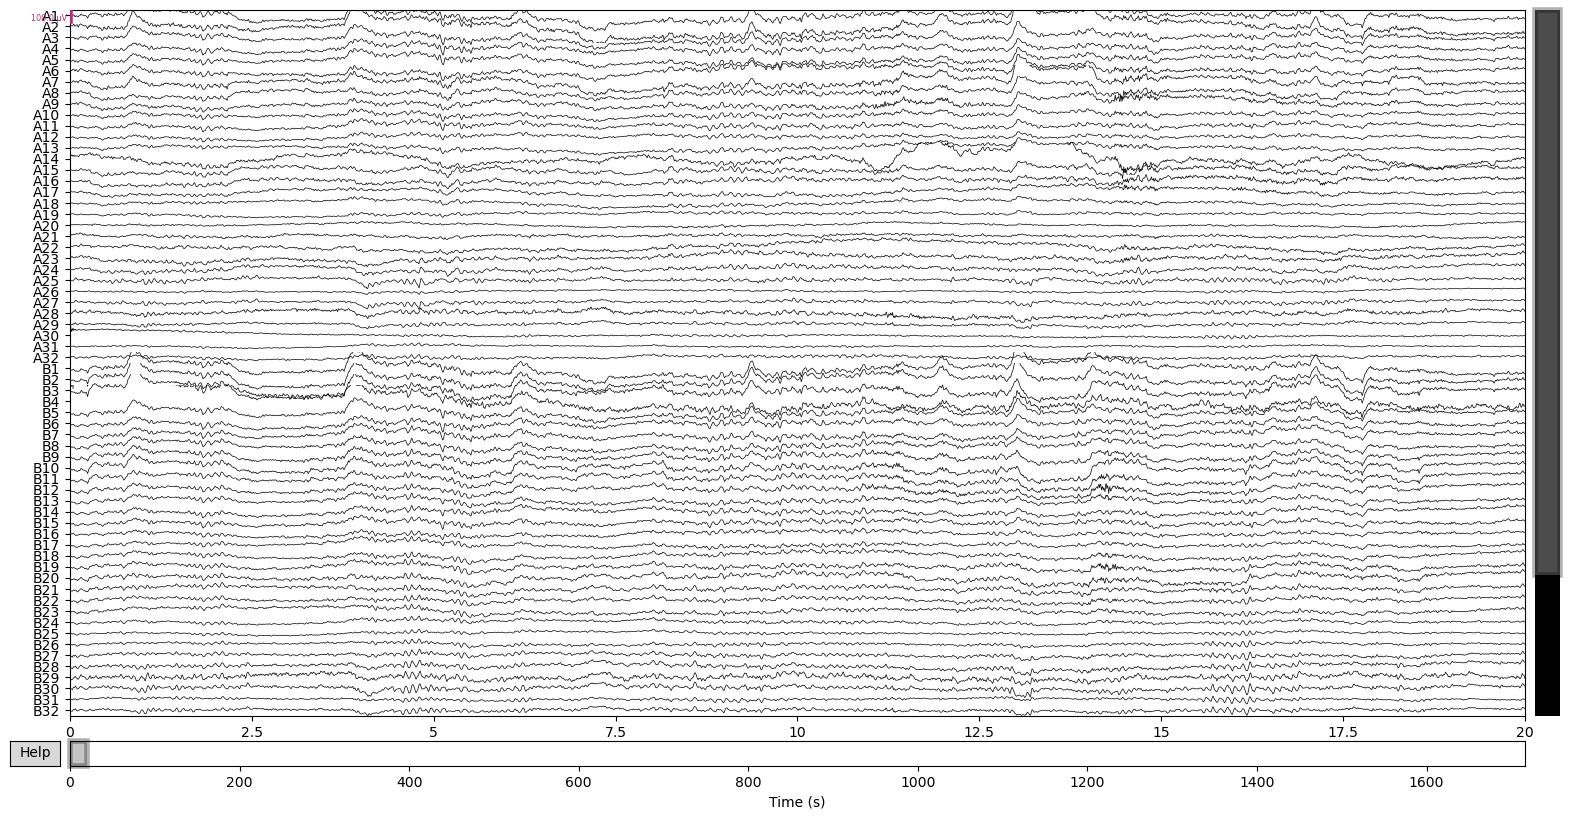

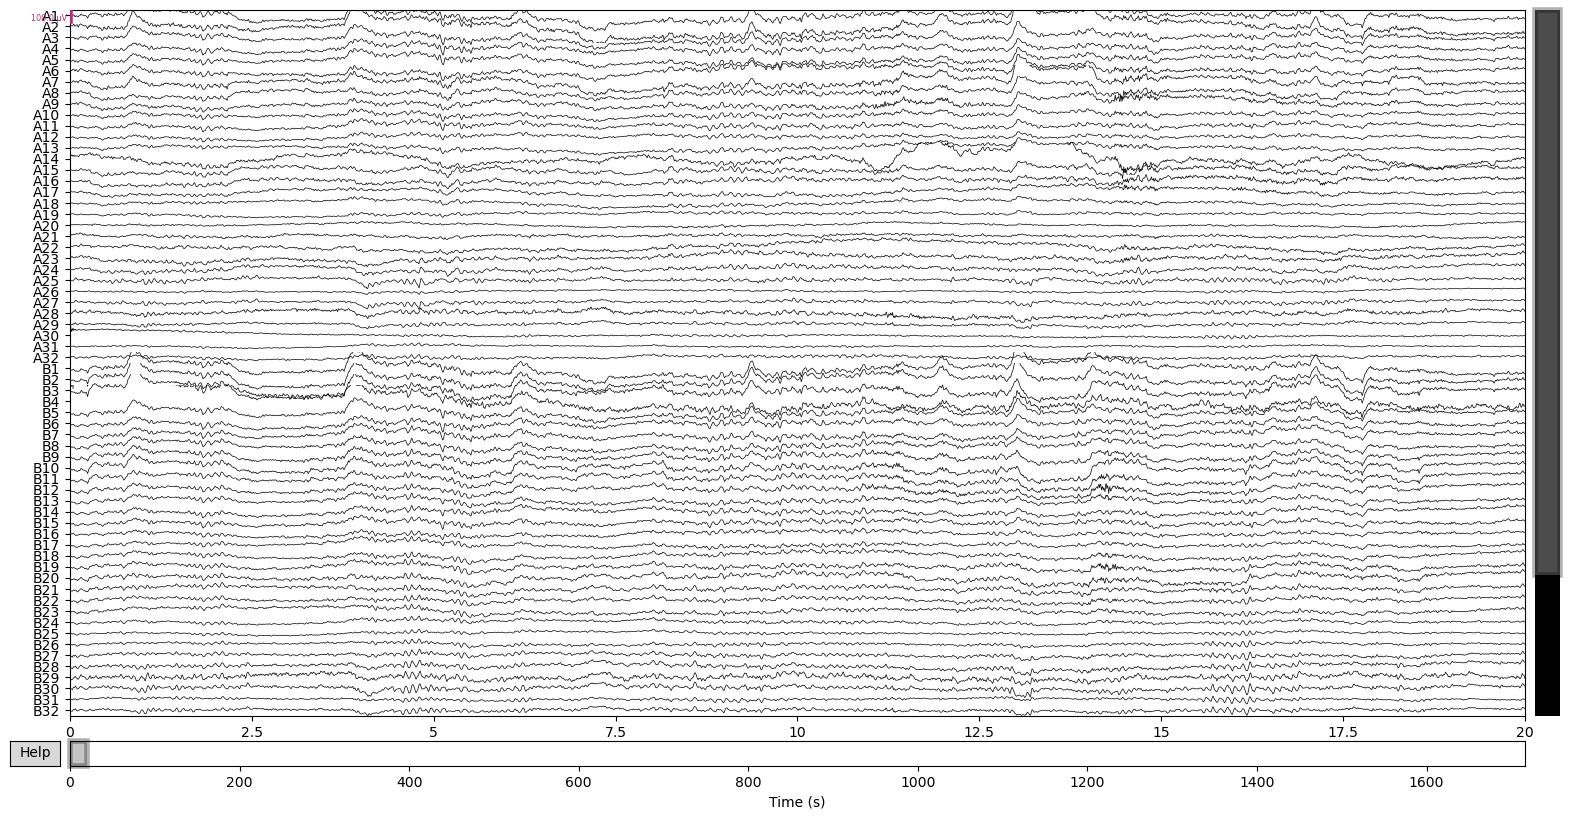

In [131]:
raw.plot(                # show only EEG channels
    scalings={'eeg': 50e-6}, 
    event_id = {
    1: 'Stimulus/Left',
    2: 'Stimulus/Right',
    10: 'Response'
}, # scale EEG amplitudes for better visibility (~50 µV/division)
    n_channels=64,              # number of channels visible at once
    #picks = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'GSR1', 'GSR2'],
    duration= 20,                # seconds per window
    show_scrollbars=True,       # enable scrollbars to navigate in time/channels
    event_color='blue'# ensure the plot pops u
)

In [59]:
print((raw.ch_names))

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status']


In [ ]:
ica = mne.preprocessing.ICA(n_components=20, method='fastica', random_state=42)
ica.fit(raw)


In [ ]:
ica.plot_properties(raw, picks=range(ica.n_components_))

In [ ]:
raw.plot_sensors(kind='topomap', show_names=True);

In [ ]:
#raw.info
#raw.plot(n_channels= 73)
#raw.info['bads'] = mne.preprocessing.find_bad_channels_maxwell(raw, cross_talk=None, calibration=None)[0]




In [ ]:
#raw.compute_psd(fmax=100).plot(picks="data", exclude="bads", amplitude=False)

In [ ]:
#raw.filter(1,40)

mne.preprocessing?


In [ ]:
#raw.compute_psd(fmax=100).plot(picks="data", exclude="bads", amplitude=False)